<a href="https://colab.research.google.com/github/BrilliantChard/Python-and-ML/blob/main/Wine_Quality_Check_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### *Importing Libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
# %matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
wine_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.8 KB


In [5]:
wine_data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


## *Processing Data*

In [6]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine_data['quality'] = pd.cut(wine_data['quality'], bins=bins, labels=group_names)

In [7]:
# wine_data['quality'].unique()

In [8]:
le = LabelEncoder()

In [9]:
wine_data['quality'] = le.fit_transform(wine_data['quality'])

In [10]:
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [11]:
wine_data['quality'].value_counts()

,count
quality,
0,1379
1,217


<Axes: ylabel='count'>

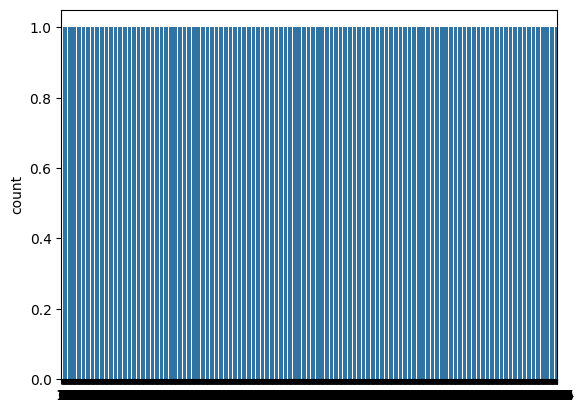

In [12]:
sns.countplot(wine_data['quality'])

In [13]:
x = wine_data.drop('quality', axis=1)
y = wine_data['quality']

In [14]:
x.shape

(1596, 11)

In [15]:
y.shape

(1596,)

# Train and Test Splitting of Data

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
x_train.shape

(1276, 11)

In [18]:
y_train.shape

(1276,)

In [19]:
x_test.shape

(320, 11)

In [20]:
y_test.shape

(320,)

### *Applying Standard Scaling*

In [23]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [24]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [25]:
x_train[:10]

array([[-1.26843280e+00, -1.15992969e+00, -1.16552574e-01,
        -1.71339971e-01, -3.48419349e-01,  6.81596039e-01,
         3.32657330e-01, -2.10477887e-01,  7.05309843e-01,
         1.86378152e+00,  1.68143759e-01],
       [ 1.62417171e-01, -1.10356109e+00,  6.56962079e-01,
         4.45196336e-02, -1.02169773e-01,  3.60552501e-03,
         6.33146325e-01,  5.78436588e-01, -7.01410306e-02,
        -1.07728849e+00, -9.62562098e-01],
       [ 1.82220314e+00, -1.18811399e+00,  1.37890909e+00,
        -3.15246374e-01, -8.16489746e-02, -1.06180814e+00,
        -9.59445345e-01,  1.04437265e+00, -2.13801003e+00,
         2.43191925e-01, -1.15101307e+00],
       [ 1.87943714e+00, -2.86216417e-01,  6.56962079e-01,
        -8.18918784e-01,  6.19966116e-02, -9.64952352e-01,
        -5.68809653e-01,  1.65447802e-01, -1.55642187e+00,
        -5.69172591e-02, -3.65800677e-01],
       [ 3.34119167e-01, -2.58032117e-01,  1.32734145e+00,
         1.05186445e+00,  2.67204592e-01, -1.25551972e+00,
  